### Combine the data from several files

In [2]:
import json
import numpy as np
from scipy import stats
import itertools
from simulate import find_mean_std_mse
import matplotlib.pyplot as plt
import matplotlib as mpl


In [3]:
#%matplotlib notebook
#%matplotlib inline

#play with this for better figure sizes 
mpl.rcParams['figure.figsize'] = (7,7)

In [4]:
PATH = "data_experiments/"

In [5]:
def plot_mean_and_confidence(plot_range, mean, mean_label, confidence_interval, 
                             confidence_interval_title):
    """
    Plot the mean and some kind of confidence interval (standard deviation or
    mean-squared-error)
    
    Parameters:
    ----------
    plot_range: iterable
    mean: an iterable
        the mean of the values at that point
    confidence_interval: an iterable
        Representing the  interval of confidence in that point. 
        The iterable should have length plot_range.
    confidence_interval_title: a string
    
    """
    
    lower_bound = np.array(mean)-np.array(confidence_interval)
    upper_bound = np.array(mean)+np.array(confidence_interval)
    plt.plot(plot_range, mean, label=mean_label)
    if confidence_interval_title:
        plt.fill_between(plot_range, lower_bound, upper_bound, 
                         label='{}'.format(confidence_interval_title),
                         alpha=0.2)
    else:
        plt.fill_between(plot_range, lower_bound, upper_bound, alpha=0.2)
        
        
def plot_results(*args, **kwargs):
    """plot results from simulations
    
    Parameters:
        args: 1 or more dicts. The dicts should have for the keys numerical
            input values and for the values iterables of numbers.
        kwargs: at least the arguments xlabel, ylabel, title
        
    """
    for argument in args:
        data, meta_dict = argument
        variable_range, mean, std, batches_std = (
            find_mean_std_mse(data, 10)
        )
        
        if kwargs['std_of_batches']: 
            plot_mean_and_confidence(variable_range, mean, meta_dict['mean_label'], 
                                     batches_std, "batches stdev")
        else:
            plot_mean_and_confidence(variable_range, mean, meta_dict['mean_label'], 
                                     std, "stdev")
    
    plt.xlabel(kwargs['xlabel'])
    plt.ylabel(kwargs['ylabel'])
    plt.legend()
    plt.title(kwargs['title'])
    plt.show()

### load the data for the maximum nudges

In [6]:
def dict_keys_from_string_to_int(dictionary):
    return {int(k):v for k,v in dictionary.items()}

def files_to_dict(file_names):
    """ Load the data from the files and make keys into ints"""
    dictionaries = []
    for file_name in file_names:
        with open(file_name, 'r') as f:
            dictionaries.append(json.load(f))

    dictionaries = [dict_keys_from_string_to_int(i) for i in dictionaries]
    return dictionaries

def compare_settings(value_to_scores, min_value, max_value):
    value_to_average_scores = {}
    for i in range(min_value, max_value+1, 1):
        average_impacts = []
        for count, dirichlet_dict in enumerate(value_to_scores):
            try:
                average_impacts.append(np.mean(dirichlet_dict[i]))
            except KeyError:
                print("the {} file has variable {} missing".format(i, count))

        value_to_average_scores[i] = average_impacts

    return value_to_average_scores

def flip_sign_values_dict(dictionary):
    for key, values in dictionary.items():
        dictionary[key] = [-value for value in values]
        
    return dictionary

def find_max_scores_per_value(dictionaries, min_value, max_value):
    value_to_maximum_scores = {}
    for i in range(min_value, max_value+1, 1):
        impacts = []
        for count, dictionary in enumerate(dictionaries):
            try:
                impacts.append(dictionary[i])
            except KeyError:
                print("the {} file has variable {} missing".format(i, count))

        max_impacts = [max(scores) for scores in list(zip(*impacts))]
        value_to_maximum_scores[i] = max_impacts

    return value_to_maximum_scores

### get maximum nudge impacts

In [7]:
def get_max_impacts(number_of_vars, number_of_states, percentage_max_entropy_size, 
                    nudge_type, dist_start, dist_end):
    filename_to_save_impacts =  "impacts_{}var_{}states_{}entropy_{}_nudge_dists{}-{}.json".format(
        number_of_vars, number_of_states, percentage_max_entropy_size, nudge_type, dist_start, dist_end
    )
    with open("data_experiments/" + filename_to_save_impacts, 'r') as f:
        impacts = json.load(f)
        
    return impacts



individual
2
3
4
5
6
7
local
2
3
4
5
6
7
synergistic
2
3
4
5
6
7
global
2
3
4
5
6
7


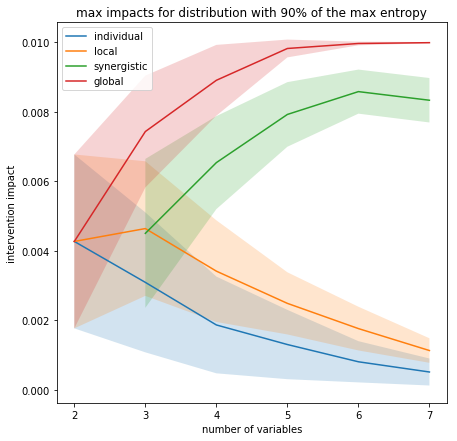

In [8]:
NUMBER_OF_STATES = 3
PERCENTAGE_MAX_ENTROPY_SIZE = 90
nudge_types = ["individual", "local", "synergistic", "global"]
numbers_of_var = [2, 3, 4, 5, 6, 7]
for nudge_type in nudge_types:
    print(nudge_type)
    var_to_impacts = {}
    for number_of_var in numbers_of_var:
        print(number_of_var)
        if nudge_type == "synergistic" and number_of_var==2:
            continue
        if nudge_type == "local" and number_of_var==2:
            impacts = get_max_impacts(
                number_of_var, NUMBER_OF_STATES, PERCENTAGE_MAX_ENTROPY_SIZE, 
                "individual", dist_start=100, dist_end=200
            )
        else:
            impacts = get_max_impacts(
                number_of_var, NUMBER_OF_STATES, PERCENTAGE_MAX_ENTROPY_SIZE, 
                nudge_type, dist_start=100, dist_end=200
            )

            if nudge_type == "local" or nudge_type == "synergistic":
                impacts = [-1*impact for impact in impacts]

        var_to_impacts[number_of_var] = impacts
        
    variable_range, mean, std, batches_std = (
        find_mean_std_mse(var_to_impacts, 10)
    )
    std2 = list(2*np.array(std))
    plot_mean_and_confidence(variable_range, mean, nudge_type, std2, None)
    
plt.xlabel("number of variables")
plt.ylabel("intervention impact")
plt.title("max impacts for distribution with {}% of the max entropy".format(PERCENTAGE_MAX_ENTROPY_SIZE))
plt.legend()
plt.show()



### Validate results maximum nudge impacts using a different process to generate the distributions

In [ ]:
NUMBER_OF_STATES = 3
PERCENTAGE_MAX_ENTROPY_SIZE = 90
nudge_types = ["individual", "local", "synergistic", "global"]
numbers_of_var = [2, 3, 4, 5, 6, 7]
for nudge_type in nudge_types:
    print(nudge_type)
    var_to_impacts = {}
    for number_of_var in numbers_of_var:
        print(number_of_var)
        if nudge_type == "synergistic" and number_of_var==2:
            continue
        if nudge_type == "local" and number_of_var==2:
            impacts = get_max_impacts(
                number_of_var, NUMBER_OF_STATES, PERCENTAGE_MAX_ENTROPY_SIZE, 
                "individual", dist_start=200, dist_end=300
            )
        else:
            impacts = get_max_impacts(
                number_of_var, NUMBER_OF_STATES, PERCENTAGE_MAX_ENTROPY_SIZE, 
                nudge_type, dist_start=200, dist_end=300
            )

            if nudge_type == "local" or nudge_type == "synergistic":
                impacts = [-1*impact for impact in impacts]

        var_to_impacts[number_of_var] = impacts
        
    variable_range, mean, std, batches_std = (
        find_mean_std_mse(var_to_impacts, 10)
    )
    std2 = list(2*np.array(std))
    plot_mean_and_confidence(variable_range, mean, nudge_type, std2, None)
    
plt.xlabel("number of variables")
plt.ylabel("intervention impact")
plt.title("max impacts for distribution with {}% of the max entropy".format(PERCENTAGE_MAX_ENTROPY_SIZE))
plt.legend()
plt.show()


### Get random nudge impacts

In [ ]:
def get_random_impacts(number_of_vars, number_of_states, percentage_max_entropy_size, 
                       nudge_type, dist_start, dist_end):
    filename_to_save_impacts =  "random_impacts_{}var_{}states_{}entropy_{}_nudge_dists{}-{}.json".format(
        number_of_vars, number_of_states, percentage_max_entropy_size, nudge_type, dist_start, dist_end 
    )
    with open("data_experiments/" + filename_to_save_impacts, 'r') as f:
        impacts = json.load(f)
        
    return impacts



In [ ]:
NUMBER_OF_STATES = 3
DIST_START, DIST_END = 100, 200
PERCENTAGE_MAX_ENTROPY_SIZE = 90

nudge_types = ["individual", "focused", "local", "synergistic", "global"]
#nudge_types = ["individual", "local", "synergistic", "global"]
#nudge_types = ["local", "synergistic", "global"]
#nudge_types = ["synergistic", "global"]

numbers_of_var = [2, 3, 4, 5, 6, 7]
for nudge_type in nudge_types:
    print(nudge_type)
    var_to_impacts = {}
    for number_of_var in numbers_of_var:
        print(number_of_var)
        if nudge_type == "synergistic" and number_of_var==2:
            continue
        if (nudge_type == "local" or nudge_type == "global") and number_of_var==2:
            impacts = get_random_impacts(
                number_of_var, NUMBER_OF_STATES, PERCENTAGE_MAX_ENTROPY_SIZE, 
                "individual", DIST_START, DIST_END
            )
        else:
            impacts = get_random_impacts(
                number_of_var, NUMBER_OF_STATES, PERCENTAGE_MAX_ENTROPY_SIZE, 
                nudge_type, DIST_START, DIST_END
            )

        var_to_impacts[number_of_var] = impacts
        
    variable_range, mean, std, batches_std = (
        find_mean_std_mse(var_to_impacts, 10)
    )
    std2 = list(2*np.array(std))
    plot_mean_and_confidence(variable_range, mean, nudge_type, std2, None)
    
plt.xlabel("number of variables")
plt.ylabel("intervention impact")
plt.title("impact of random interventions for {}% of the max entropy".format(PERCENTAGE_MAX_ENTROPY_SIZE))
plt.legend()
plt.show()


### Combine data experiment impact on MI of minimalizing individual nudge impact

In [9]:
def load_files_json(file_names):
    dicts = []
    for file_name in file_names:
        with open(file_name, 'r') as f:
            dicts.append(json.load(f))
            
    return dicts

def update_dictkeys_unicode2string(dictionary):
    return {str(k):v for k,v in dictionary.items()}

def combine_data_dicts(dictionaries):
    """
    Combine data dicts, meaning that all data of the same key are merged into a new dict
    
    Parameters:
    ----------
    dictionaries: a list of dicts
        Every key of the dicts should have a list as values 

    """
    new_dict = {}
    for dictionary in dictionaries:
        for key, values in dictionary.items():
            if key in new_dict:
                new_dict[key].extend(values)
            else:
                new_dict[key] = values
                
    return new_dict

def get_average_values_dict(dictionary):
    """take average of all values dictionary"""
    return {k:np.mean(v) for k, v in dictionary.items()}

#for 2 input vars with 5 states
file_name_format2 = "minimize_individual_focused_nudge_impact_kl_divergence_inspect_change_MI_2var_5states{}.json"
files_vars2 = [PATH + file_name_format2.format(i) for i in ["", 1, 3, 4, 5, 6]]
dictionaries_vars2 = load_files_json(files_vars2)
dictionaries_vars2 = [update_dictkeys_unicode2string(dictionary) for dictionary in dictionaries_vars2]
dictionary_vars2 = combine_data_dicts(dictionaries_vars2)
print(get_average_values_dict(dictionary_vars2))

#for 3 input vars with 5 states
file_name_format3 = "minimize_individual_focused_nudge_impact_inspect_change_MI_3var_5states{}.json"
files_vars3 = [PATH + file_name_format3.format(i) for i in ["", 2, 3, 4, 5]]
dictionaries_vars3 = load_files_json(files_vars3)
dictionaries_vars3 = [update_dictkeys_unicode2string(dictionary) for dictionary in dictionaries_vars3]
dictionary_vars3 = combine_data_dicts(dictionaries_vars3)
print(get_average_values_dict(dictionary_vars3))

#something is wrong !!! mutual information 4 variables waay to high
file_vars4 = "minimize_individual_focused_nudge_impact_inspect_change_MI_4var_5states.json"
dictionaries_vars4 = load_files_json([PATH + file_vars4])
dictionary_vars4 = update_dictkeys_unicode2string(dictionaries_vars4[0])
print(get_average_values_dict(dictionary_vars4))

{'impact_after': 3.007298611341186e-05, 'mi_after': 0.14667514319890104, 'impact_before': 5.7637418943678235e-05, 'mi_before': 0.21959086454706087}
{'impact_after': 7.172282444333051e-06, 'mi_after': 0.054871355930750675, 'impact_before': 1.2987512109998274e-05, 'mi_before': 0.070452646416604744}
{'impact_after': 1.5486815215445593e-06, 'mi_before': 0.019623418020733245, 'impact_before': 2.2681870853415616e-06, 'mi_after': 0.017394584143839334}


### Correlation MI and individual nudge impact

In [44]:
def load_data_correlation_MI_nudge_impact(var_to_file_names, multiple_files4=False):
    """
    Parameters:
    ----------
    var_to_files: a dict
    
    """
    var_to_MI_and_nudge_impact = {}
    for number_of_var, file_names in var_to_file_names.items():
        file_names = [PATH+file_name for file_name in file_names]
        if number_of_var == 5 or (number_of_var == 4 and multiple_files4):
            mi_and_nudge_impact_lists = load_files_json(file_names)
            var_to_MI_and_nudge_impact[number_of_var] = [
                list(itertools.chain.from_iterable(mi_and_nudge_impact_lists))
            ]
        else:
            var_to_MI_and_nudge_impact[number_of_var] = load_files_json(file_names)[0]

    return var_to_MI_and_nudge_impact

focused_nudge_kl_divergence_impact_and_MI_var_to_files = {
    1: ["correlation_MI_individual_nudge_impact_1var_5states_min_output001_ex1.json"],
    2: ["correlation_MI_individual_nudge_impact_2var_5states_min_output001_ex2.json"],
    3: ["correlation_MI_individual_nudge_impact_3var_5states_min_output001_exp3.json"],
    4: ["correlation_MI_individual_nudge_impact_4var_5states_min_output001_exp4.json"],
    5: [
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_exp5_points0_20.json",
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_exp6_point20_40.json",
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_exp3_points40_60.json",
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_ex2_points60_80.json",
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_ex1_points80_100.json"
    ]
}

focused_nudge_kl_divergence_impact_and_MI_var_to_files2 = {
    1: ["correlation_MI_individual_nudge_impact_1var_5states_min_output001_ex1_0_300.json"],
    2: ["correlation_MI_individual_nudge_impact_2var_5states_min_output001_ex3_0_300.json"],
    3: ["correlation_MI_individual_nudge_impact_3var_5states_min_output001_ex1_0_300.json"],
    4: [
        "correlation_MI_individual_nudge_impact_4var_5states_min_output001_exp4.json",
        "correlation_MI_individual_nudge_impact_4var_5states_min_output001_ex4_200_250.json",
        "correlation_MI_individual_nudge_impact_4var_5states_min_output001_ex5_250_300.json"
    ],
    5: [
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_exp5_points0_20.json",
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_exp6_point20_40.json",
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_exp3_points40_60.json",
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_ex2_points60_80.json",
        "correlation_MI_individual_nudge_impact_5var_5states_min_output001_ex1_points80_100.json"
    ]
}

focused_nudge_l1norm_impact_and_MI_var_to_files = {
    1: ["correlation_MI_individual_nudge_impact_1var_5states_l1norm_ex1.json"],
    2: ["correlation_MI_individual_nudge_impact_2var_5states_l1norm_ex2.json"],
    3: ["correlation_MI_individual_nudge_impact_3var_5states_l1norm_exp3.json"],
    4: [
        "correlation_MI_individual_nudge_impact_4var_5states_l1norm_exp4.json",
        "correlation_MI_individual_nudge_impact_4var_5states_l1norm_exp1_200_250.json",
        "correlation_MI_individual_nudge_impact_4var_5states_l1norm_exp2_250_300.json"
    ],
    5: [
        "correlation_MI_individual_nudge_impact_5var_5states_l1norm_exp5_points0_20.json",
        "correlation_MI_individual_nudge_impact_5var_5states_l1norm_exp6_point20_40.json",
        "correlation_MI_individual_nudge_impact_5var_5states_l1norm_ex1_points40_60.json",
        "correlation_MI_individual_nudge_impact_5var_5states_l1norm_ex2_points60_80.json",
        "correlation_MI_individual_nudge_impact_5var_5states_l1norm_ex1_points80_90.json",
        "correlation_MI_individual_nudge_impact_5var_5states_l1norm_ex2_points90_100.json"
    ]
}

vector_nudge_kl_divergence_impact_and_MI_var_to_files = {
    1: ["correlation_MI_individual_vector_nudge_impact_1var_5states_min_output001_ex1.json"],
    2: ["correlation_MI_individual_vector_nudge_impact_2var_5states_kl-divergence_ex2.json"],
    3: ["correlation_MI_individual_vector_nudge_impact_3var_5states_kl-divergence_ex1.json"],
    4: ["correlation_MI_individual_vector_nudge_impact_4var_5states_kl-divergence_ex2.json"],
    5: [
        "correlation_MI_individual_vector_nudge_impact_5var_5states_kl-divergence_ex3_points0_30.json",
        "correlation_MI_individual_vector_nudge_impact_5var_5states_kl-divergence_ex1_points30_60.json",
        "correlation_MI_individual_vector_nudge_impact_5var_5states_kl-divergence_ex1_points60_70.json",
        "correlation_MI_individual_vector_nudge_impact_5var_5states_kl-divergence_ex2_points70_80.json",
        "correlation_MI_individual_vector_nudge_impact_5var_5states_kl-divergence_ex3_points80_90.json",
        "correlation_MI_individual_vector_nudge_impact_5var_5states_kl-divergence_ex4_points90_100.json"
    ]
}

vector_nudge_l1norm_impact_and_MI_var_to_files = {
    1: ["correlation_MI_individual_vector_nudge_impact_1var_5states_l1norm_ex1.json"],
    2: ["correlation_MI_individual_vector_nudge_impact_2var_5states_l1norm_ex2.json"],
    3: ["correlation_MI_individual_vector_nudge_impact_3var_5states_l1norm_ex3.json"],
    4: ["correlation_MI_individual_vector_nudge_impact_4var_5states_l1norm_ex4.json"],
    5: [
        "correlation_MI_individual_vector_nudge_impact_5var_5states_l1norm_ex5_point0_30.json",
        "correlation_MI_individual_vector_nudge_impact_5var_5states_l1norm_exp6_points30_60.json",
        "correlation_MI_individual_vector_nudge_impact_5var_5states_l1norm_ex5_point60_90.json",
        "correlation_MI_individual_vector_nudge_impact_5var_5states_l1norm_exp6_points90_120.json"
    ]
}

var_to_focused_nudge_kl_divergence_impact_and_MI = load_data_correlation_MI_nudge_impact(
    focused_nudge_kl_divergence_impact_and_MI_var_to_files2, True
)

var_to_focused_nudge_l1norm_impact_and_MI = load_data_correlation_MI_nudge_impact(
    focused_nudge_l1norm_impact_and_MI_var_to_files, True
)

var_to_vector_nudge_kl_divergence_impact_and_MI = load_data_correlation_MI_nudge_impact(
    vector_nudge_kl_divergence_impact_and_MI_var_to_files
)

var_to_vector_nudge_l1norm_impact_and_MI = load_data_correlation_MI_nudge_impact(
    vector_nudge_l1norm_impact_and_MI_var_to_files
)



In [45]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Plot correlations

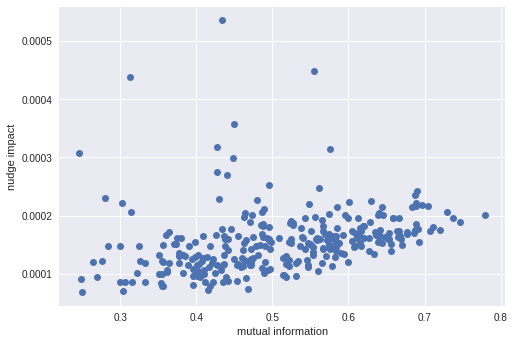

LinregressResult(slope=575.03305229479793, intercept=0.41828396400331708, rvalue=0.28096144631830017, pvalue=7.5728818940087112e-07, stderr=113.78422721381942)


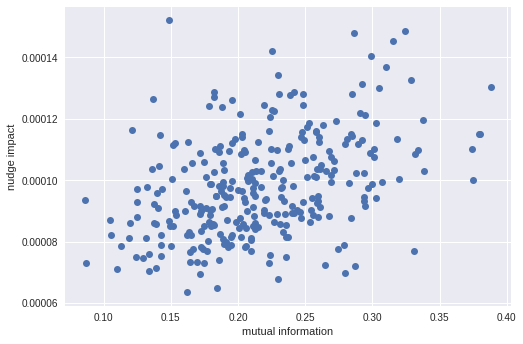

LinregressResult(slope=1392.4164015643385, intercept=0.080175503341914867, rvalue=0.41015539482770369, pvalue=1.3344925179997906e-13, stderr=179.35556748521171)


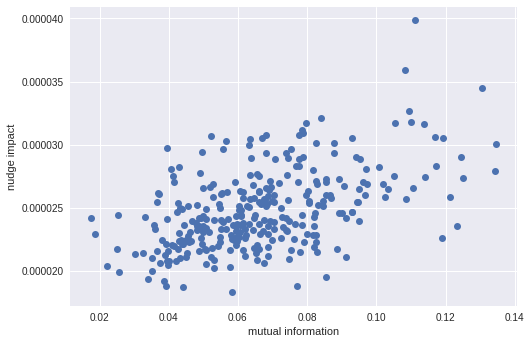

LinregressResult(slope=3586.2780716915845, intercept=-0.022563846041574492, rvalue=0.51244392876456635, pvalue=1.7326879366949665e-21, stderr=348.12996176211419)


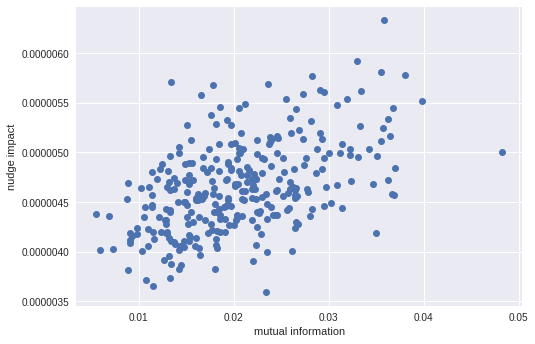

LinregressResult(slope=7974.1040543574691, intercept=-0.016490732290451011, rvalue=0.50141401367549487, pvalue=1.6668690544151725e-20, stderr=797.07202203184249)


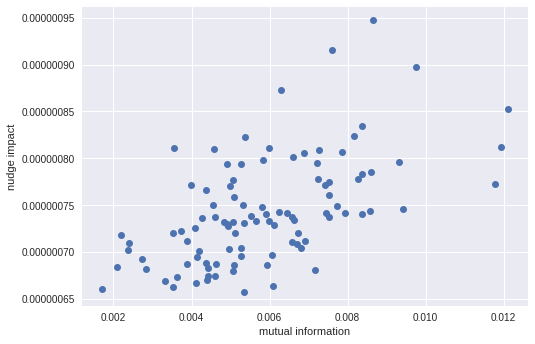

LinregressResult(slope=20650.03216870032, intercept=-0.0094957422912663424, rvalue=0.57289551250388659, pvalue=4.7111517532297095e-10, stderr=2984.3467223356706)


In [46]:
#import seaborn as sns
#add seaborn linregress on own computer

dict_to_use = var_to_focused_nudge_kl_divergence_impact_and_MI
# dict_to_use = var_to_focused_nudge_l1norm_impact_and_MI
# dict_to_use = var_to_vector_nudge_kl_divergence_impact_and_MI
# dict_to_use = var_to_vector_nudge_l1norm_impact_and_MI

for var, impact_nudges_and_mi in dict_to_use.items():
    if var == 5 or var ==4:
        impact_nudges_and_mi=impact_nudges_and_mi[0]

    impact_nudges = [item[0] for item in impact_nudges_and_mi] 
    mutual_information_sizes = [item[1] for item in impact_nudges_and_mi]
        
    plt.plot(mutual_information_sizes, impact_nudges, 'o')
    plt.xlabel("mutual information")
    plt.ylabel("nudge impact")
    plt.show()
    print(stats.linregress(impact_nudges, mutual_information_sizes))


300


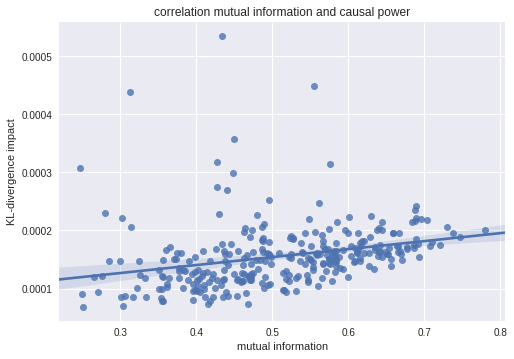

LinregressResult(slope=575.03305229479793, intercept=0.41828396400331708, rvalue=0.28096144631830017, pvalue=7.5728818940087112e-07, stderr=113.78422721381942)
300


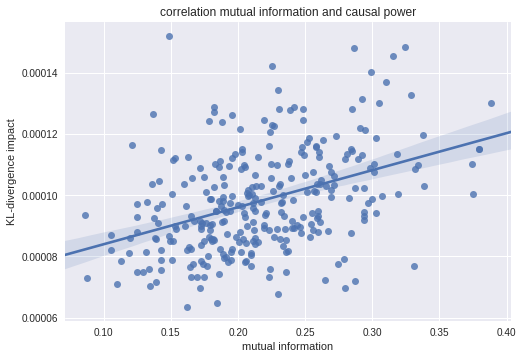

LinregressResult(slope=1392.4164015643385, intercept=0.080175503341914867, rvalue=0.41015539482770369, pvalue=1.3344925179997906e-13, stderr=179.35556748521171)
300


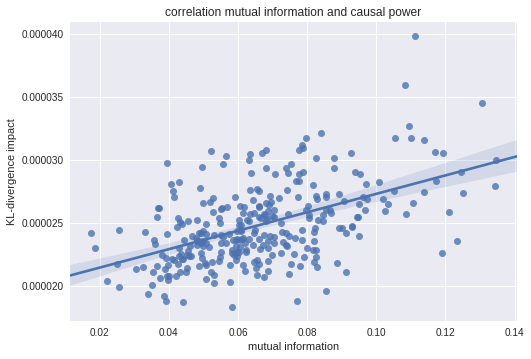

LinregressResult(slope=3586.2780716915845, intercept=-0.022563846041574492, rvalue=0.51244392876456635, pvalue=1.7326879366949665e-21, stderr=348.12996176211419)
300


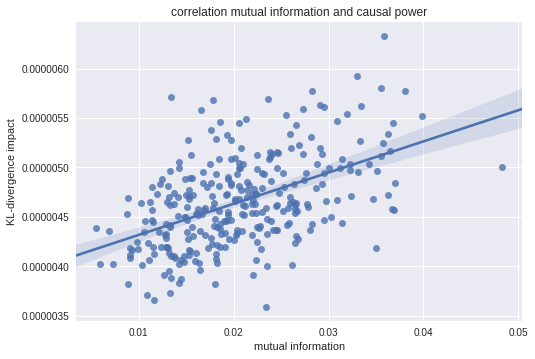

LinregressResult(slope=7974.1040543574691, intercept=-0.016490732290451011, rvalue=0.50141401367549487, pvalue=1.6668690544151725e-20, stderr=797.07202203184249)
100


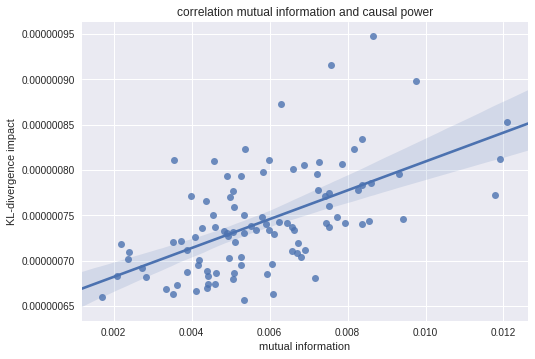

LinregressResult(slope=20650.03216870032, intercept=-0.0094957422912663424, rvalue=0.57289551250388659, pvalue=4.7111517532297095e-10, stderr=2984.3467223356706)


In [51]:
import seaborn as sns
import pandas as pd

dict_to_use = var_to_focused_nudge_kl_divergence_impact_and_MI
# dict_to_use = var_to_focused_nudge_l1norm_impact_and_MI
# dict_to_use = var_to_vector_nudge_kl_divergence_impact_and_MI
# dict_to_use = var_to_vector_nudge_l1norm_impact_and_MI

for var, impact_nudges_and_mi in dict_to_use.items():
    if var == 5 or var ==4:
        impact_nudges_and_mi = impact_nudges_and_mi[0]       
        impact_nudges = [item[0] for item in impact_nudges_and_mi]
        print(len(impact_nudges))
        mutual_information_sizes = [item[1] for item in impact_nudges_and_mi]
    else:
        impact_nudges = [item[0] for item in impact_nudges_and_mi] 
        print(len(impact_nudges))
        mutual_information_sizes = [item[1] for item in impact_nudges_and_mi]

    
#     df = pd.DataFrame({"mutual information": mutual_information_sizes, "l1-norm impact": impact_nudges}) 
#     sns.regplot("mutual information", "l1-norm impact", df)
    df = pd.DataFrame({"mutual information": mutual_information_sizes, "KL-divergence impact": impact_nudges}) 
    sns.regplot("mutual information", "KL-divergence impact", df)
    plt.title("correlation mutual information and causal power")
    sns.plt.show()
    print(stats.linregress(impact_nudges, mutual_information_sizes))


### After removing outliers

In [ ]:
#import seaborn as sns
#add seaborn linregress on own computer

focused_nudges = var_to_focused_nudge_kl_divergence_impact_and_MI
focused_nudges[1] = [i for i in focused_nudges[1] if i[0] < 0.00025]

vector_nudges = var_to_vector_nudge_kl_divergence_impact_and_MI
vector_nudges[1] = [i for i in vector_nudges[1] if i[0] < 0.00006]

for var, impact_nudges_and_mi in focused_nudges.items():
    if var == 5:
        impact_nudges_and_mi=impact_nudges_and_mi[0]

    impact_nudges = [item[0] for item in impact_nudges_and_mi] 
    mutual_information_sizes = [item[1] for item in impact_nudges_and_mi]
        
    plt.plot(mutual_information_sizes, impact_nudges, 'o')
    plt.xlabel("mutual information")
    plt.ylabel("nudge impact")
    plt.show()
    print(stats.linregress(impact_nudges, mutual_information_sizes))


#### Relation MI and nudge impact for 1 input and 1 output 

In [ ]:
def plot_nudge_impact_given_mi(data_dict, title, ylabel, yrange=None):
    plot_range, mean, std, batches_std = find_mean_std_mse(data_dict, batch_size=1)
    lower_bound = np.array(mean) - 2*np.array(std)
    upper_bound = np.array(mean) + 2*np.array(std)
    plt.plot(plot_range, mean, label="mean")
    plt.fill_between(plot_range, lower_bound, upper_bound, 
                     label='{}'.format("std"),
                     alpha=0.2)

    plt.xlabel("mutual information")
    plt.ylabel(ylabel)
    #plt.legend()
    plt.title(title)
    if yrange:
        plt.ylim(yrange)
    
    plt.show()

    print(stats.linregress(np.array(plot_range), np.array(mean)))

def string_keys_to_numbers(data_dict):
    for mi_value, values in data_dict.items():
        data_dict[round((float(mi_value)*100.0))/100.0] = values
        data_dict.pop(mi_value, None)
    
    return data_dict
    
#load the data
with open("data_experiments/individual_nudge_impact_kl_divergence_focused_given_MI2.json", 'r') as f:
    focused_kl_divergence = json.load(f)
    
with open("data_experiments/individual_nudge_impact_l1norm_focused_given_MI2.json", 'r') as f:
    focused_l1norm = json.load(f)

with open("data_experiments/individual_nudge_impact_kl_divergence_vector_given_MI2.json", 'r') as f:
    vector_kl_divergence = json.load(f)

with open("data_experiments/individual_nudge_impact_absolute_vector_given_MI2.json", 'r') as f:
    vector_l1norm = json.load(f)
    
focused_kl_divergence = string_keys_to_numbers(focused_kl_divergence)
focused_l1norm = string_keys_to_numbers(focused_l1norm)
vector_kl_divergence = string_keys_to_numbers(vector_kl_divergence)
vector_l1norm = string_keys_to_numbers(vector_l1norm)

plot_nudge_impact_given_mi(
    focused_kl_divergence, 
    "impact of focused interventions for a fixed mutual information", 
    "KL-divergence impact",
    (-0.00005, 0.0002)
)
plot_nudge_impact_given_mi(
    focused_l1norm, "impact of focused interventions for a fixed mutual information", "l1-norm impact"
)
plot_nudge_impact_given_mi(
    vector_kl_divergence, 
    "impact of individual interventions for a fixed mutual information", 
    "KL-divergence impact",
    (-0.00004, 0.00012)
)
plot_nudge_impact_given_mi(
    vector_l1norm, "impact of individual interventions for a fixed mutual information", "l1-norm impact"
)
    

In [ ]:
with open("data_experiments/individual_nudge_impact_kl_divergence_focused_given_MI2.json", 'r') as f:
    focused_kl_divergence = json.load(f)
    
with open("data_experiments/individual_nudge_impact_kl_divergence_vector_given_MI2.json", 'r') as f:
    vector_kl_divergence = json.load(f)
    
focused_kl_divergence = string_keys_to_numbers(focused_kl_divergence)
vector_kl_divergence = string_keys_to_numbers(vector_kl_divergence)

print(np.array(focused_kl_divergence[0.85]))
print(np.array(vector_kl_divergence[0.85]))
focused_kl_divergence[0.85] = [i for i in focused_kl_divergence[0.85] if i < 1e-03]
vector_kl_divergence[0.85] = [i for i in vector_kl_divergence[0.85] if i < 1e-04]

plot_nudge_impact_given_mi(
    focused_kl_divergence, "focused nudge impact for a fixed mutual information cleaned data", "nudge impact (KL-divergence)"
)
plot_nudge_impact_given_mi(
    vector_kl_divergence, "vector nudge impact for a fixed mutual information cleaned data", "nudge impact (KL-divergence)"
)


In [ ]:
with open("data_experiments/relation_MI_nudge_impact_1input_non_biased1.json", 'r') as f:
    data_dict = json.load(f)

with open("data_experiments/relation_MI_nudge_impact_1input_non_biased2.json", 'r') as f:
    data_dict1 = json.load(f)
    
for mi_value, values in data_dict1.items():
    data_dict1[round((float(mi_value)*1000.0))/1000.0] = values
    data_dict1.pop(mi_value, None)
    
for mi_value, values in data_dict.items():
    data_dict[round((float(mi_value)*100.0))/100.0] = values
    data_dict.pop(mi_value, None)
    
data_dict.update(data_dict1)

In [ ]:
print({k:len(v) for k,v in data_dict.items()})
plot_range, mean, std, batches_std = find_mean_std_mse(data_dict, batch_size=1)
print(np.array(data_dict[0.85]))

In [ ]:
lower_bound = np.array(mean)-np.array(std)
upper_bound = np.array(mean)+np.array(std)
print(lower_bound)
print(upper_bound)
print(plot_range)
plt.plot(plot_range, mean, label="mean")
plt.fill_between(plot_range, lower_bound, upper_bound, 
                 label='{}'.format("std"),
                 alpha=0.2)

plt.xlabel("mutual information")
plt.ylabel("KL-divergence")
#plt.legend()
plt.title('Individual nudge impact for set mutual information')
plt.show()

stats.linregress(np.array(plot_range), np.array(mean))

In [ ]:
data_dict[0.85] = [i for i in data_dict[0.85] if i < 1e-03]
print(np.array(data_dict[0.85]))

In [ ]:
plot_range, mean, std, batches_std = find_mean_std_mse(data_dict, batch_size=1)
lower_bound = np.array(mean)-np.array(std)
upper_bound = np.array(mean)+np.array(std)
print(lower_bound)
print(upper_bound)
print(plot_range)
plt.plot(plot_range, mean, label="mean")
plt.fill_between(plot_range, lower_bound, upper_bound, 
                 label='{}'.format("std"),
                 alpha=0.2)

plt.xlabel("mutual information")
plt.ylabel("KL-divergence")
#plt.legend()
plt.title('Individual nudge impact for set mutual information')
plt.show()

stats.linregress(np.array(plot_range), np.array(mean))

### Make correlation plots

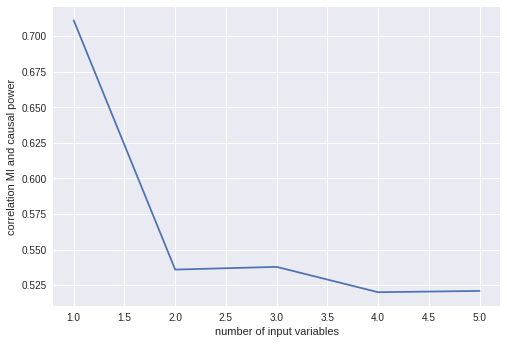

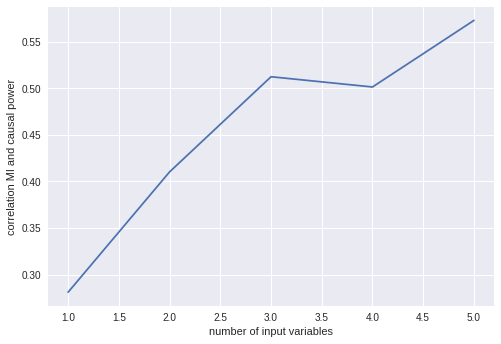

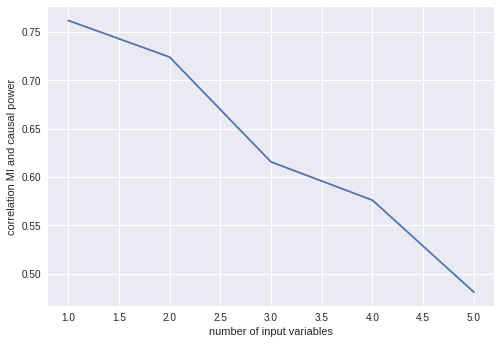

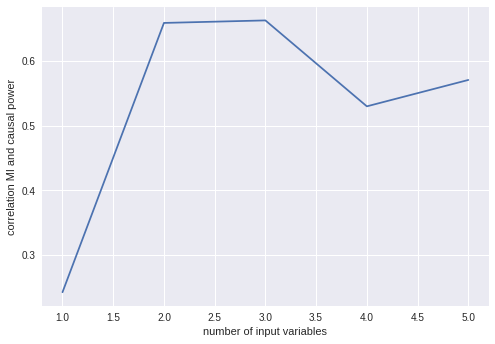

In [52]:
input_vars = [1, 2, 3, 4, 5]
focused_l1norm_correlations = [0.711, 0.5359, 0.5378, 0.5200, 0.5209]
focused_kl_divergence_correlations = [0.2810, 0.4102, 0.5124, 0.5014, 0.5729]
vector_l1norm_correlations = [0.762, 0.7241, 0.6156, 0.576, 0.4808]
vector_kl_divergence_correlations = [0.2424, 0.6589, 0.6628, 0.5299, 0.5707]

plt.plot(input_vars, focused_l1norm_correlations)
plt.xlabel("number of input variables")
plt.ylabel("correlation MI and causal power")
plt.show()

plt.plot(input_vars, focused_kl_divergence_correlations)
plt.xlabel("number of input variables")
plt.ylabel("correlation MI and causal power")
plt.show()

plt.plot(input_vars, vector_l1norm_correlations)
plt.xlabel("number of input variables")
plt.ylabel("correlation MI and causal power")
plt.show()

plt.plot(input_vars, vector_kl_divergence_correlations)
plt.xlabel("number of input variables")
plt.ylabel("correlation MI and causal power")
plt.show()

### Show output marginal has less states with low probability as number of variables increases

In [ ]:
import seaborn as sb
#based on 1000 distributions
def dict_keys_from_string_to_int(dictionary):
    return {int(k):v for k,v in dictionary.items()}


filename ="/home/derkjan/Documents/academics_UVA/master_thesis/code/data_experiments/states_below_0.1.json"
with open(filename, 'r') as f:
    number_of_vars_to_low_probable_states = json.load(f)
    
number_of_vars_to_low_probable_states = dict_keys_from_string_to_int(number_of_vars_to_low_probable_states)
print(number_of_vars_to_low_probable_states)

plt.plot(number_of_vars_to_low_probable_states.keys(), number_of_vars_to_low_probable_states.values())
plt.xlabel("number of variables")
plt.ylabel("number of output marginals below 0.1")
plt.show()



In [ ]:
filename ="/home/derkjan/Documents/academics_UVA/master_thesis/code/data_experiments/distances_output_uniform.json"
with open(filename, 'r') as f:
    number_of_vars_to_distance_output_uniform = json.load(f)
    
variable_range, mean, std, batches_std = (
    find_mean_std_mse(number_of_vars_to_distance_output_uniform, 30)
)
print(mean)
print(std)
lower_bound = np.array(mean) - 2*np.array(batches_std)
upper_bound = np.array(mean) + 2*np.array(batches_std)

print(lower_bound)
print(upper_bound)

plt.plot(range(1,6,1), mean)
plt.fill_between(range(1,6,1), lower_bound, upper_bound, 
                 label='{}'.format("95%"),
                 alpha=0.2)
plt.xlabel("number of variables")
plt.ylabel("distance to uniform distribution")
plt.legend()
plt.show()